## Обучение на полном датасете (7000 кадров с 6 камер) YOLO8n три класса

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import output
!pip install ultralytics
output.clear()

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

# Обучение

In [ ]:
model = YOLO('yolov8n.pt')

!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/ColabData/Kaski_All/data.yaml name=/content/drive/MyDrive/ColabData/Kaski_All/result_yolo3 batch=32 epochs=8


Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ColabData/Kaski_All/data.yaml, epochs=8, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=result_yolo33, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

# Графики

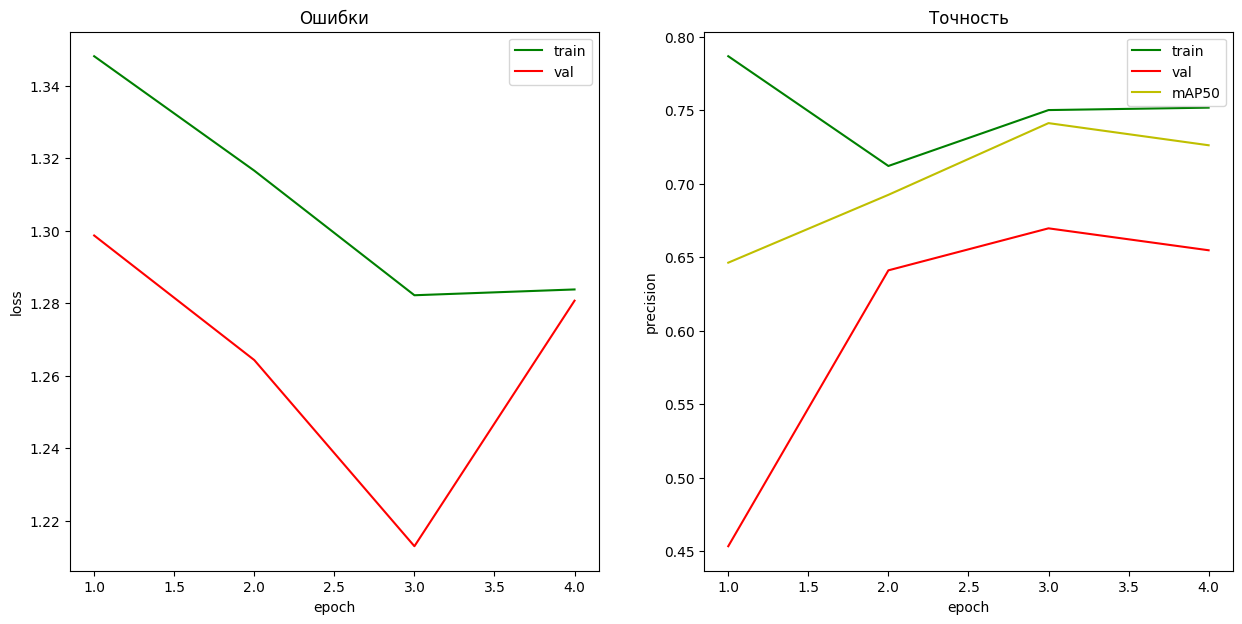

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ColabData/Kaski_All/result_yolo33/results.csv')

for i in data.columns:
    data.rename(columns = {i:"".join(i.split())}, inplace=True)

fig = plt.figure(figsize=(15, 7))
plt.subplot(121)
x = data['epoch']
y1 = data['train/box_loss']
y2 = data['val/box_loss']
plt.plot(x, y1, label='train', color='g')
plt.plot(x, y2, label='val', color='r')
plt.title('Ошибки')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
x = data['epoch']
y1 = data['metrics/precision(B)']
y2 = data['metrics/recall(B)']
y3 = data['metrics/mAP50(B)']
plt.plot(x, y1, label='train', color='g')
plt.plot(x, y2, label='val', color='r')
plt.plot(x, y3, label='mAP50', color='y')
plt.title('Точность')
plt.xlabel('epoch')
plt.ylabel('precision')
plt.legend()
plt.show()


# Модуль проверки совмещения рамки Person с рамкой No-Hardhat

### ссылка на файл модели
https://drive.google.com/file/d/10chKP260qqUiTal2PHdzoSOvW0_h02sm/view?usp=sharing


image 1/1 /content/drive/My Drive/ColabData/TestCross/576_000394.jpg: 480x640 3 Hardhats, 1 NO-Hardhat, 4 Persons, 298.3ms
Speed: 4.7ms preprocess, 298.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
2 0.5508295297622681 0.7659847140312195 0.17251354455947876 0.28659161925315857

2 0.23943306505680084 0.2643404006958008 0.05063781142234802 0.21481691300868988

2 0.17187857627868652 0.30341479182243347 0.06360244750976562 0.29431483149528503

0 0.16688352823257446 0.17432117462158203 0.024426504969596863 0.03471635654568672

0 0.6153552532196045 0.6700450778007507 0.05123448371887207 0.0680595263838768

0 0.16734570264816284 0.18711702525615692 0.026568695902824402 0.060185689479112625

1 0.2425118237733841 0.17120175063610077 0.018446773290634155 0.025319278240203857

2 0.5303252935409546 0.7902920842170715 0.1478247046470642 0.2753286063671112

No-Hadhat number= 0   Person= 1   ALARM


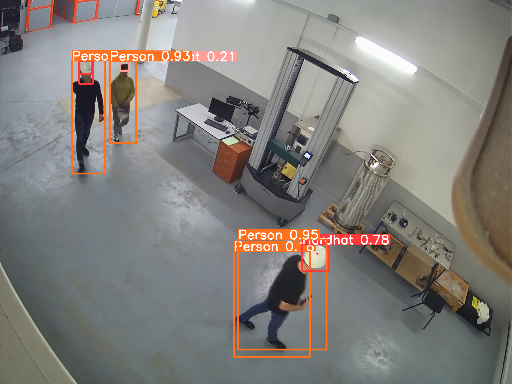


image 1/1 /content/drive/My Drive/ColabData/TestCross/576_000395.jpg: 480x640 3 Hardhats, 1 NO-Hardhat, 4 Persons, 216.4ms
Speed: 4.6ms preprocess, 216.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
0 0.20894169807434082 0.2649621069431305 0.03673116862773895 0.04225873947143555

2 0.21741902828216553 0.4097132682800293 0.08587779104709625 0.3294784724712372

0 0.720612108707428 0.7011551260948181 0.043034911155700684 0.06549326330423355

2 0.2770083546638489 0.35727572441101074 0.06388512253761292 0.23986423015594482

2 0.6428471803665161 0.7934801578521729 0.20098286867141724 0.24659299850463867

1 0.2779483199119568 0.25590768456459045 0.02513822913169861 0.03876900672912598

2 0.6770551204681396 0.7468946576118469 0.13203883171081543 0.16432738304138184

0 0.2095140516757965 0.28090497851371765 0.03891420364379883 0.06840196996927261

No-Hadhat number= 0   Person= 1   ALARM


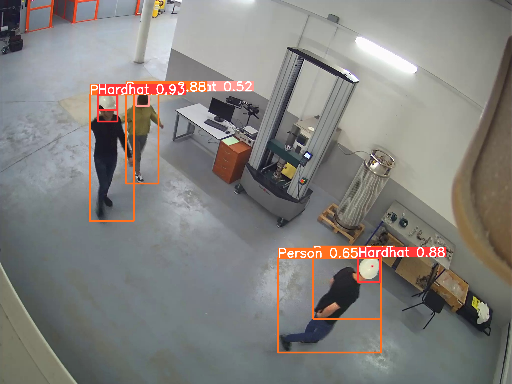


image 1/1 /content/drive/My Drive/ColabData/TestCross/576_000396.jpg: 480x640 2 Hardhats, 2 NO-Hardhats, 4 Persons, 244.1ms
Speed: 4.6ms preprocess, 244.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
0 0.8213340044021606 0.7452515959739685 0.0380740761756897 0.05530468747019768

2 0.7520840167999268 0.8203806281089783 0.17130732536315918 0.23812119662761688

0 0.2967025637626648 0.39175859093666077 0.05495813488960266 0.05313301086425781

2 0.2824457287788391 0.5284995436668396 0.10379959642887115 0.3184695541858673

2 0.34168919920921326 0.40468311309814453 0.049156367778778076 0.17200864851474762

1 0.33994007110595703 0.3385331332683563 0.025830745697021484 0.04157288745045662

2 0.3404601216316223 0.4505321681499481 0.05069562792778015 0.2629025876522064

1 0.33949077129364014 0.3429510295391083 0.032009512186050415 0.052629727870225906

No-Hadhat number= 0   Person= 2   ALARM
No-Hadhat number= 0   Person= 3   ALARM
No-Hadhat number= 1   Person= 2   ALARM
No-

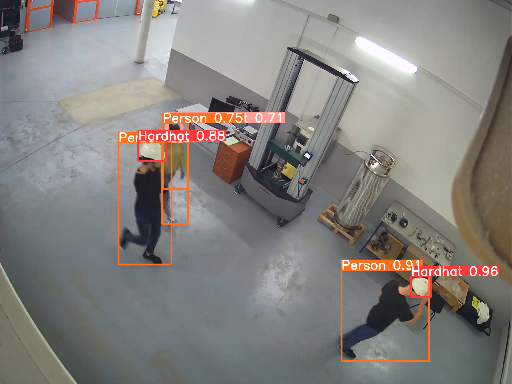

In [ ]:
# Модуль проверки совмещения рамки Person с рамкой No-Hardhat
directory = '/content/drive/My Drive/ColabData/'
test_dir = directory+'TestCross/'

# загружаем обученную модель
model = YOLO('/content/drive/MyDrive/ColabData/Kaski_All/result_yolo33/weights/best.pt')
# ссылка на файл модели https://drive.google.com/file/d/10chKP260qqUiTal2PHdzoSOvW0_h02sm/view?usp=sharing

# берем все кадры из директории для predict
for image in os.listdir(test_dir):
        # получаем predict
        results = model(test_dir+image, conf=0.15)
        # считаем количество рамок
        bboxes_count = results[0].__len__() # number of bboxes detected
        # извлекаем набор рамок и набор классов, которым принадлежат эти рамки
        Boxes = results[0].boxes.xywhn
        Clases = results[0].boxes.cls
        # создание списков рамок Person и No-Hardhat
        pers, nohard=[],[]
        # проходим по всем рамкам
        for j in range(bboxes_count):
            # номер класса
            clas=int(Clases[j].item())
            print(str(clas)+' '+str(Boxes[j,0].item())+' '+str(Boxes[j,1].item())+' '+str(Boxes[j,2].item())+' '+str(Boxes[j,3].item())+'\n')#Отладка
            # формируем список в формате "номер класса, координаты рамки" (такая же форма, как для разметки Yolo)
            lst=[clas,Boxes[j,0].item(),Boxes[j,1].item(),Boxes[j,2].item(),Boxes[j,3].item()]

            # сортируем рамки на два списка No-Hardhat и Person, остальное игнорируем
            if clas==1:
              nohard.append(lst)
            elif clas==2:
              pers.append(lst)
        # проверяем: находится ли центр рамки No-Hardhat внутри рамки person
        for j_no in range(len(nohard)):
          for j_p in range(len(pers)):
            if pers[j_p][1]-pers[j_p][3]/2 <= nohard[j_no][1] <= pers[j_p][1]+pers[j_p][3]/2 and \
               pers[j_p][2]-pers[j_p][4]/2 <= nohard[j_no][2] <= pers[j_p][2]+pers[j_p][4]/2:
               # выводим номера пересекающихся рамок и далее можно сохранять кадр в список нарушителей
               print("No-Hadhat number=",j_no,"  Person=",j_p,'  ALARM')

        # берем картинку с predict
        annotated_frame = results[0].plot() # annotated frame
        # вывод картинки на дисплей
        img_ann = Image.fromarray(annotated_frame[::4, ::4, ::-1])
        display(img_ann) #Display the annotated frame
